In [1]:
#Import the Necessary Libraries

import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [2]:
#Extract data from the dataset

fldr="./UTkFace"

In [3]:
import os
flies=os.listdir(fldr)

In [4]:
#Create List of images from the dataset
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

In [5]:
#Create List of Age and Gender from the dataset

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

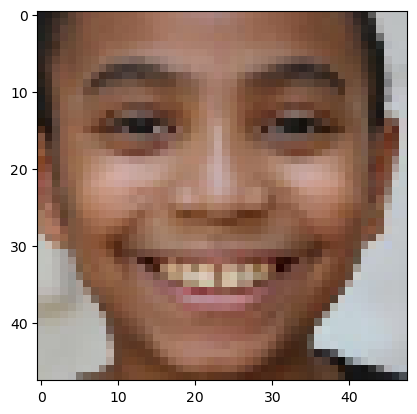

In [6]:
#Viewing a sample

plt.imshow(images[87])

In [7]:
print(ages[87])


10


In [8]:
print(genders[87])

0


In [9]:
#Saving images array,ages array, and genders array in the system

images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [11]:
#Finding the no. of Male and Female samples respectively

values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[11434 10327]


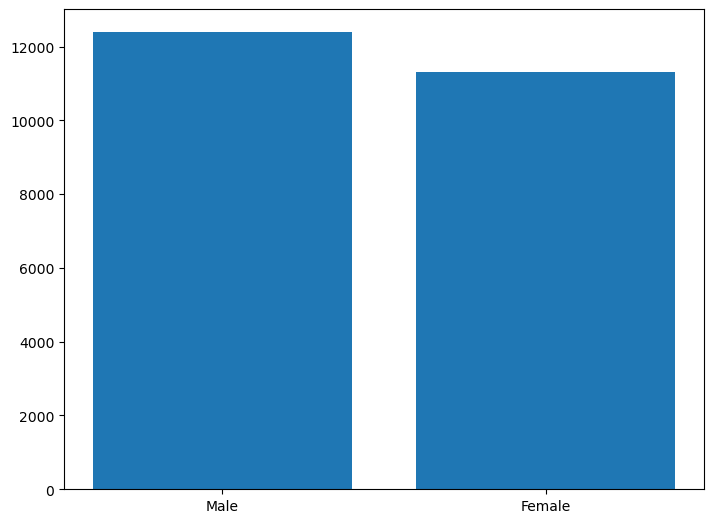

In [12]:
#Plotting the No. of Male and Female Samples
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [13]:
#Finding The no. of samples in each age
values, counts=np.unique(ages_f,return_counts=True)
print(counts)


[1123  482  289  273  196   92  156   65  130   81  157  177  247  158
  262   98  284  346  395  426  859  734 2197  615  918  570  724  350
  664  143  409  880  483  293  325  266  526  132  266  157  100  440
  153  170  153  148  381  138  232  241  353  268  236   97  271   82
  293  161  125  103   50  259   77   94  100   56   11    2    1    5
    5    1    3    4]


In [14]:
#Converting Age counts to lists
val=values.tolist()
cnt=counts.tolist()

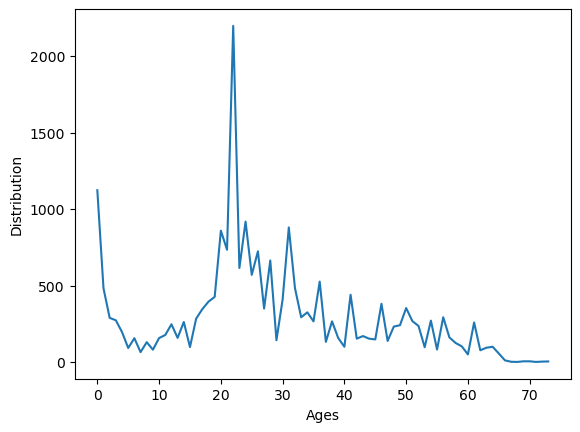

In [15]:
#Plotting The Samples Agewise


plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [16]:
#Definig Labes for Output
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1


In [17]:
#Creating another list of images from existing one
#For better learning
images_f_2=images_f/255


In [18]:
images_f_2.shape

(21761, 48, 48, 3)

In [19]:
labels_f=np.array(labels)

In [20]:
#Splitting The Dataset into test and train

from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [22]:
Y_train[0:5]

array([[25,  1],
       [ 2,  0],
       [ 3,  1],
       [26,  1],
       [37,  0]])

In [23]:
#Splitting 'Y_test' and 'Y_train' further
#For better understanding

Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]


In [24]:
Y_train_2[0][0:5]

array([1, 0, 1, 1, 0])

In [25]:

Y_train_2[1][0:5]

array([25,  2,  3, 26, 37])

In [26]:
#Defining the Model
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x


In [27]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [28]:
Model=model((48,48,3))

In [29]:
Model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
#Initializing the Model

fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [32]:
#Running the Model
#This will take some time
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)


Epoch 1/250


255/255 [==============================] - ETA: 0s - loss: 14.3517 - sex_out_loss: 0.6877 - age_out_loss: 13.4677 - sex_out_accuracy: 0.5779 - age_out_accuracy: 0.0515
Epoch 1: val_loss improved from inf to 16.15222, saving model to Age_Sex_Detection.h5


C:\documents\New folder\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


255/255 [==============================] - 47s 169ms/step - loss: 14.3517 - sex_out_loss: 0.6877 - age_out_loss: 13.4677 - sex_out_accuracy: 0.5779 - age_out_accuracy: 0.0515 - val_loss: 16.1522 - val_sex_out_loss: 0.6609 - val_age_out_loss: 15.3148 - val_sex_out_accuracy: 0.5602 - val_age_out_accuracy: 0.0509
Epoch 2/250
255/255 [==============================] - ETA: 0s - loss: 11.8812 - sex_out_loss: 0.5857 - age_out_loss: 11.0886 - sex_out_accuracy: 0.6860 - age_out_accuracy: 0.0513
Epoch 2: val_loss improved from 16.15222 to 11.56001, saving model to Age_Sex_Detection.h5
255/255 [==============================] - 41s 160ms/step - loss: 11.8812 - sex_out_loss: 0.5857 - age_out_loss: 11.0886 - sex_out_accuracy: 0.6860 - age_out_accuracy: 0.0513 - val_loss: 11.5600 - val_sex_out_loss: 0.5189 - val_age_out_loss: 10.7973 - val_sex_out_accuracy: 0.7473 - val_age_out_accuracy: 0.0489
Epoch 3/250
255/255 [==============================] - ETA: 0s - loss: 10.0035 - sex_out_loss: 0.5024 - a

In [33]:
#Model Evaluation

Model.evaluate(X_test,Y_test_2)

171/171 [==============================] - 5s 25ms/step - loss: 7.0161 - sex_out_loss: 0.2382 - age_out_loss: 6.1741 - sex_out_accuracy: 0.8895 - age_out_accuracy: 0.0509


[7.016140460968018,
 0.2382112592458725,
 6.174124240875244,
 0.8895423412322998,
 0.05090975761413574]

In [34]:
pred=Model.predict(X_test)


171/171 [==============================] - 5s 24ms/step


In [35]:
pred[1]

array([[ 1.2036611],
       [38.82284  ],
       [37.749317 ],
       ...,
       [38.99576  ],
       [24.616846 ],
       [41.642414 ]], dtype=float32)

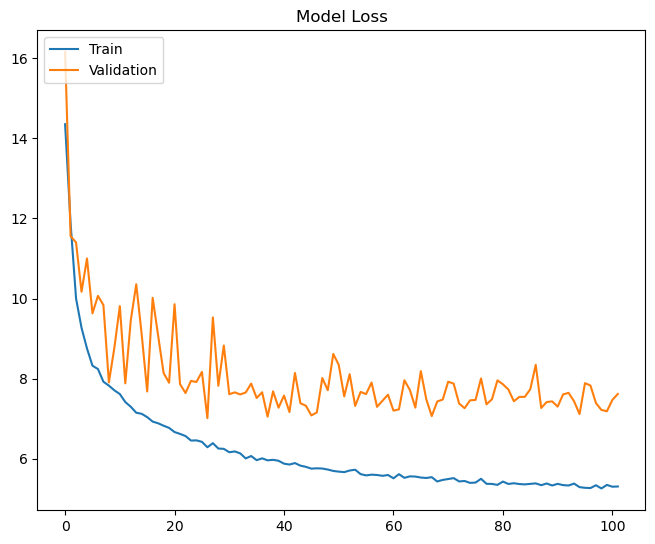

In [36]:
#Plotting Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

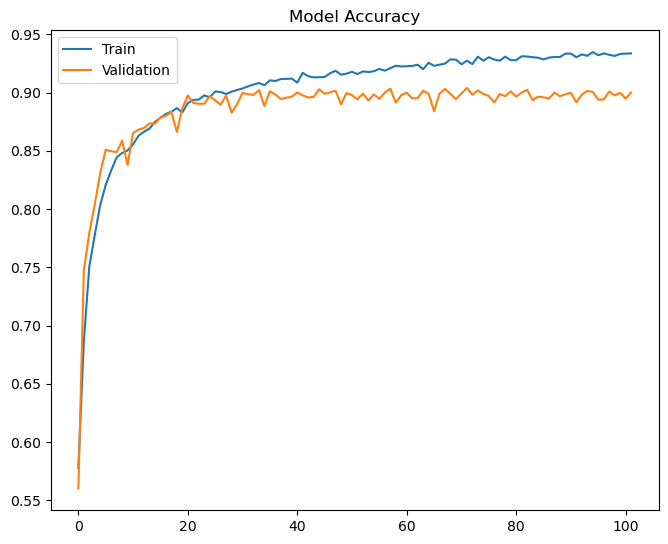

In [37]:
#Plotting Sex Accuracy
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


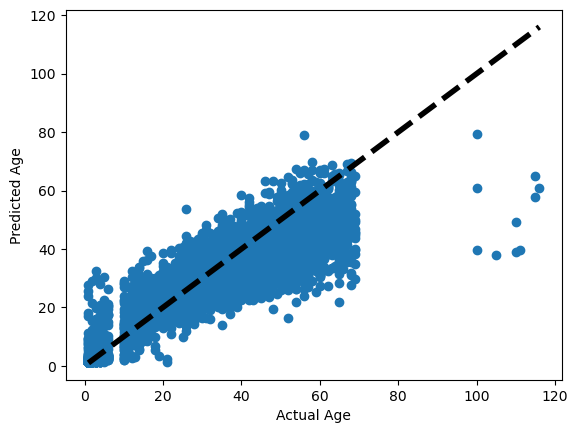

In [38]:
#Plotting Gender Accuracy
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [39]:
#Making Report of the Model (Gender Only)

i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [41]:
report=classification_report(Y_test_2[0],Pred_l)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2823
           1       0.85      0.94      0.89      2618

    accuracy                           0.89      5441
   macro avg       0.89      0.89      0.89      5441
weighted avg       0.89      0.89      0.89      5441



In [43]:
#Making Heatmap of the Model (Gender only)
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

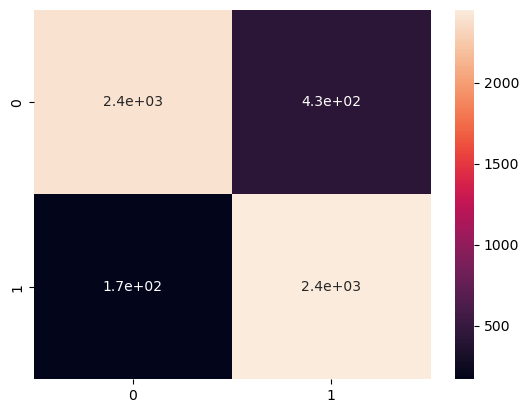

In [44]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [45]:
#Testing The Images Ourself

def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])


1/1 [==============================] - 0s 31ms/step
Predicted Age is 81
Predicted Gender is Male


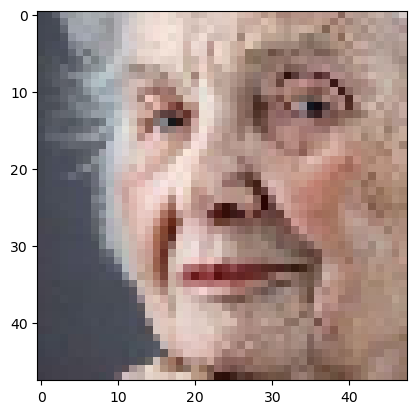

In [46]:
#Test 1

test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 78ms/step
Predicted Age is 14
Predicted Gender is Male


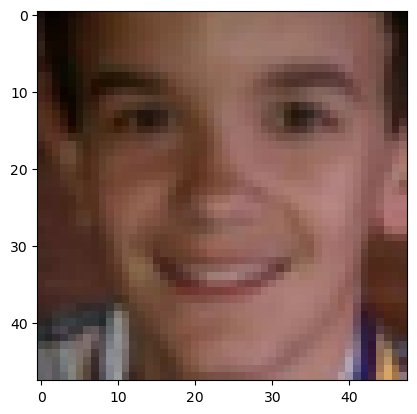

In [47]:
#Test 2

test_image(23,images_f,images_f_2,Model)

1/1 [==============================] - 0s 63ms/step
Predicted Age is 22
Predicted Gender is Female


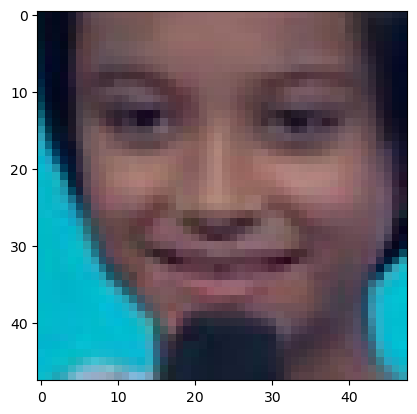

In [48]:
#Testt 3
test_image(168,images_f,images_f_2,Model)


1/1 [==============================] - 0s 63ms/step
Predicted Age is 24
Predicted Gender is Male


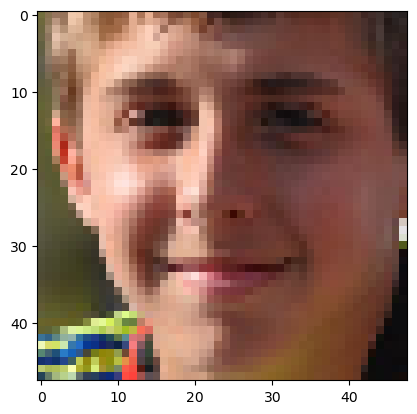

In [49]:
#Test 4  error in age in this case

test_image(888,images_f,images_f_2,Model)

1/1 [==============================] - 0s 63ms/step
Predicted Age is 26
Predicted Gender is Female


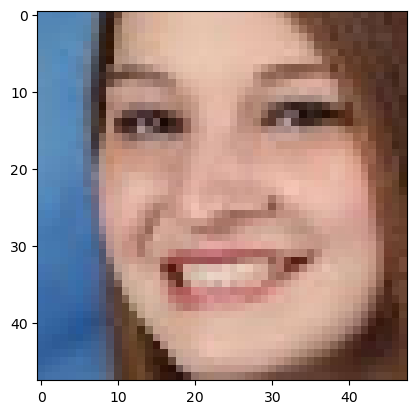

In [50]:
#Test 5 
test_image(1288,images_f,images_f_2,Model)